In [2]:
import numpy as np
import sys
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplt_style_n
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'

import scipy
import shapely

import mplt_style_n
import os 
os.environ["PATH"] += os.pathsep + "/Library/TeX/texbin"

plt.style.use(mplt_style_n.style1)

In [3]:
from shapely.geometry import Point
import geopandas as gpd
import fiona
from geopandas import GeoDataFrame
from shapely.geometry import Polygon

### 1) Use the functions for this project

In [4]:
# if working on Colab:
#!pip install git+https://github.com/lonanni/InnovationProject_WaterQuality; #build env from here
#from WaterQuality_project import report_functions as rf


In [5]:
from WaterQuality_project import report_functions as rf

### 2) Loading the dataframe

In [6]:
data_dir = "./data"
region_code = "SSD" #change it for the region code of your region of interest
# Load the dataset as build in Build_WaterQualityDataset
df = pd.read_csv(data_dir+'/'+region_code+'WaterQualityData.csv', );

### 3) Data path

In [7]:
borders_data = data_dir+"/Distribution/"
regions_path = borders_data + "RGN_DEC_2021_EN_BFC.shp"
district_path = borders_data + "Districts.shp"
river_dir = data_dir+'/OSrivers/data'


### 4) Prepare dataset - preprocessing

In [8]:
processor = rf.WaterQualityProcessor(df)


In [9]:
df = processor.prepare()

### 5) Geographycal preprocessing

In [10]:
# List of desired labels (ordered as in your original water_names index)
style_by_type = {
    "SEWAGE":     {"color": "deeppink",  "marker": "^", "label": "sewage"},
    "TRADE":     {"color": "red",  "marker": "*", "label": "trade"},
    "ESTUARINE":  {"color": "lightblue", "marker": "o", "edgecolor": "blue", "label": "estuarine"},
    "RIVER":      {"color": "green",     "marker": "s", "label": "freshwater"},
    "OCEAN":      {"color": "darkblue",  "marker": "D", "label": "ocean"},
}
labels = ["RIVER", "SEWAGE", "ESTUARINE", "TRADE", "OCEAN",]
water_names = ['RIVER / RUNNING SURFACE WATER',
 'FINAL SEWAGE EFFLUENT',
 'ESTUARINE WATER',
 'ANY TRADE EFFLUENT', 'SEA WATER']
water_type_map = {label: water_names[i] for i, label in enumerate(labels)}


In [11]:
target_regions = ["South East", "South West"]
postcode_numbers = np.concatenate([range(13), range(33, 36)])
postcode_of_interest = "PO"

In [12]:
preprocessor = rf.WaterSystemPreprocessor(
    regions_path=regions_path,
    district_path=district_path, 
    river_dir=river_dir,
    df=df,
    labels=labels,
    water_type_map=water_type_map
)

# Run the complete preprocessing pipeline
preprocessor.preprocess(
    target_regions=target_regions,
    postcode_of_interest=postcode_of_interest,
    postcode_numbers=postcode_numbers
)
# Access individual components
df_of_interest = preprocessor.df_of_interest
samples_by_system = preprocessor.samples_by_system

/Users/lolla/Desktop/InnovationProject_WaterQuality/WaterQuality_project/report_functions.py:360: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  ).explode()


### 6) Analysis

### a) Dividing datasets in body of water or water typology

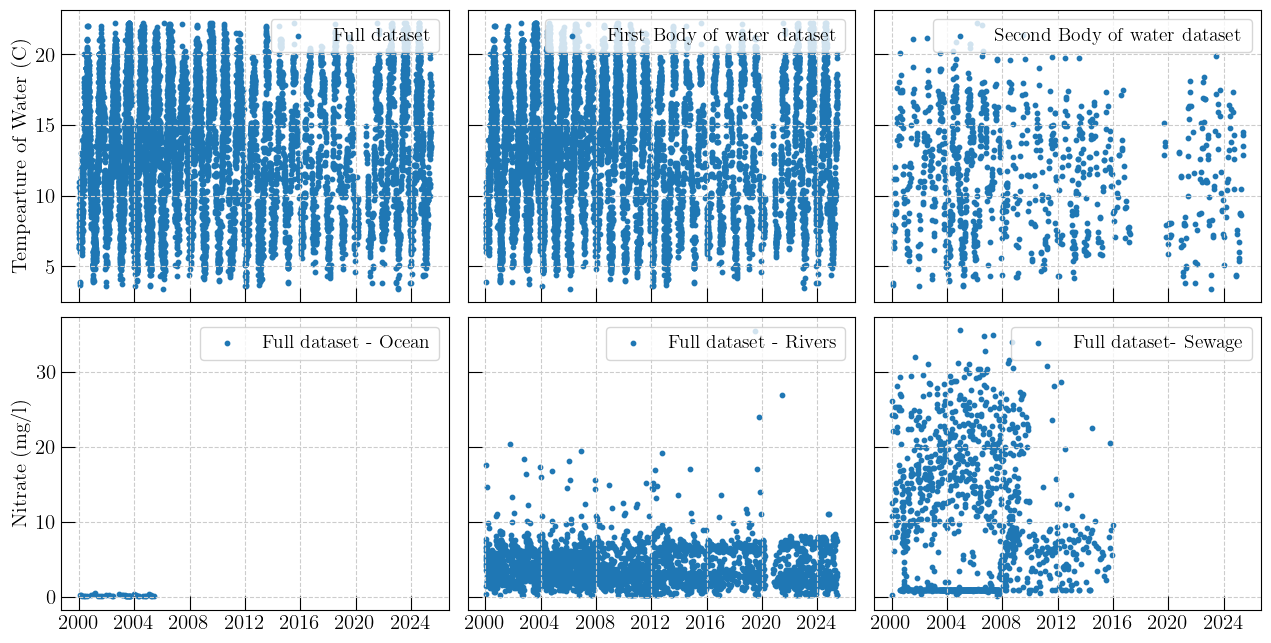

In [13]:
fig, axes = plt.subplots(nrows=2,ncols=3, sharey='row', sharex=True, figsize=(12,6))
fig.subplots_adjust(0,0,1.,1.,0.05,0.05)

axes[0,0].scatter(df_of_interest["Date"], df_of_interest["Temperature of Water"], s=10, label="Full dataset")
axes[0,1].scatter(samples_by_system[0]["Date"], samples_by_system[0]["Temperature of Water"], s=10, label="First Body of water dataset")
axes[0,2].scatter(samples_by_system[4]["Date"], samples_by_system[4]["Temperature of Water"], s=10, label="Second Body of water dataset")

axes[1,0].scatter(df_of_interest[df_of_interest["sample.sampledMaterialType.label"]=='SEA WATER']["Date"],\
                   df_of_interest[df_of_interest["sample.sampledMaterialType.label"]=='SEA WATER']['Nitrate as N'], s=10, label="Full dataset - Ocean")
axes[1,1].scatter(df_of_interest[df_of_interest["sample.sampledMaterialType.label"]=='RIVER / RUNNING SURFACE WATER']["Date"],\
                   df_of_interest[df_of_interest["sample.sampledMaterialType.label"]=='RIVER / RUNNING SURFACE WATER']['Nitrate as N'], s=10, label="Full dataset - Rivers")
axes[1,2].scatter(df_of_interest[df_of_interest["sample.sampledMaterialType.label"]=='FINAL SEWAGE EFFLUENT']["Date"],
                   df_of_interest[df_of_interest["sample.sampledMaterialType.label"]=='FINAL SEWAGE EFFLUENT']['Nitrate as N'], s=10, label="Full dataset- Sewage")

axes[1, 0].set_ylabel("Nitrate (mg/l)")
axes[0, 0].set_ylabel("Tempearture of Water (C)")


for i in range(2):
    for j in range(3):
        axes[i, j].grid(which='major', color='#CCCCCC', linestyle='--')
        axes[i, j].legend(fontsize=14, loc = 'upper right')



#### b) Considering the chemicals of interest for sewage/farming

In [14]:
determinants_N = ['Ammonia un-ionised as N', 'Ammoniacal Nitrogen as N', 'Nitrate as N', 'Nitrite as N']
determinants_P = ['Orthophosphate, reactive as P']

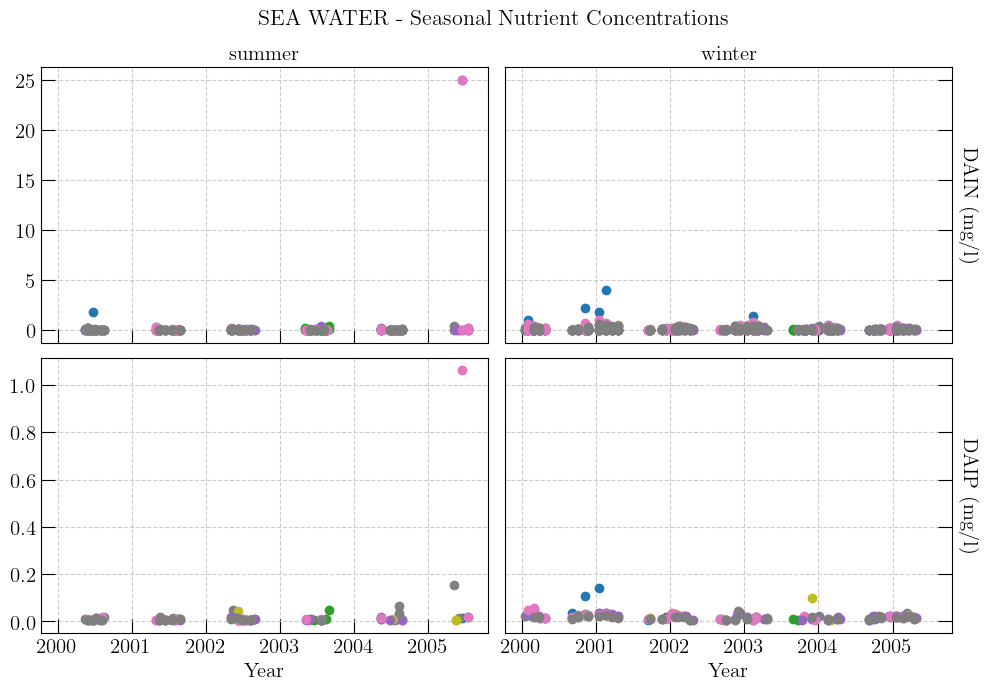

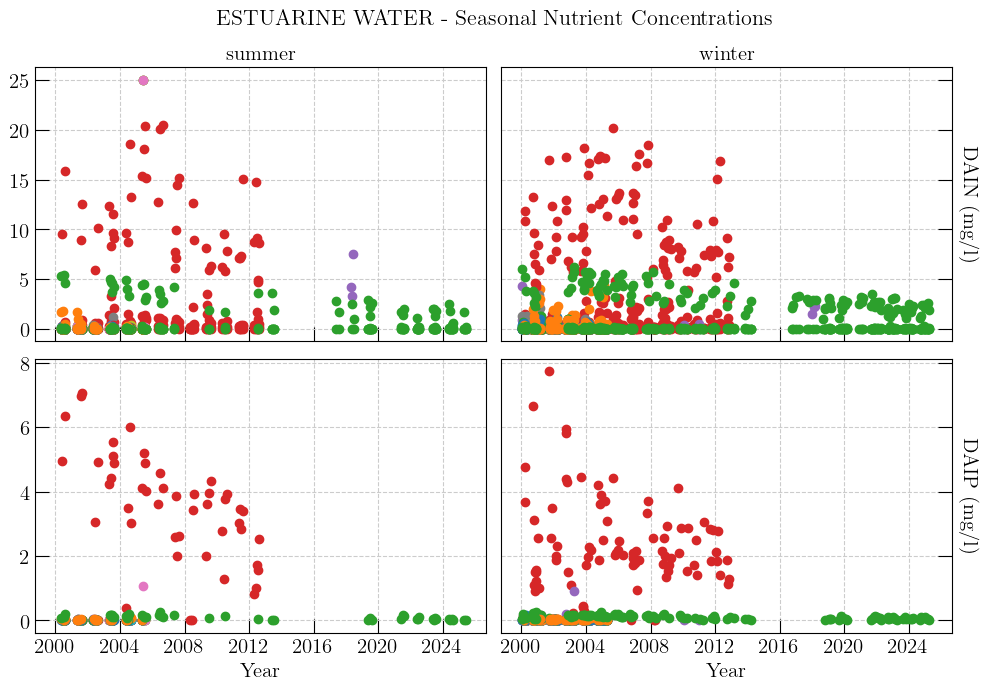

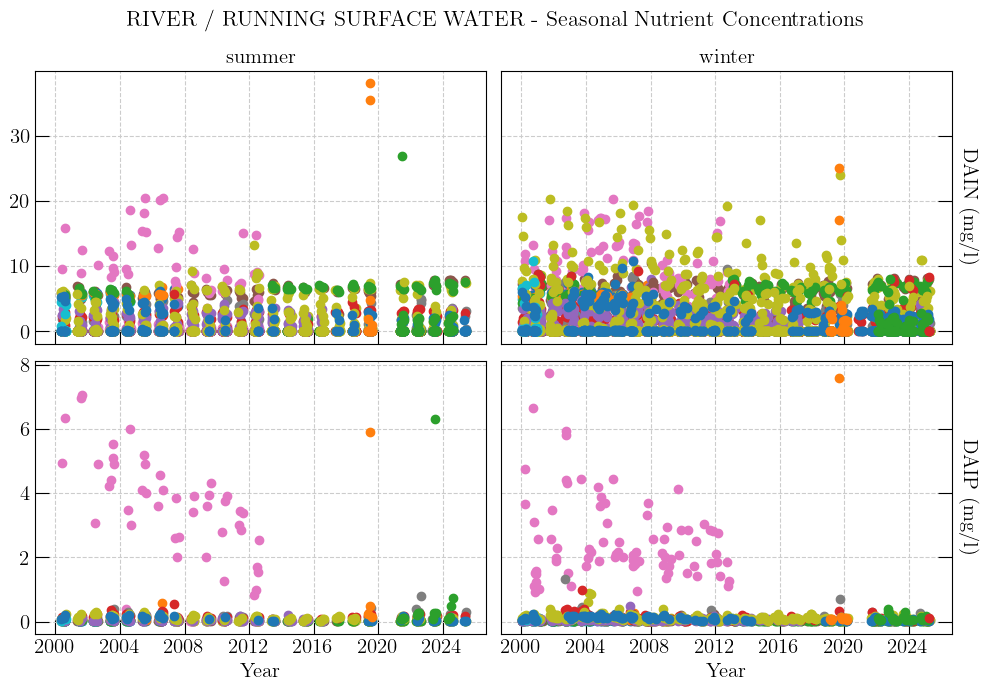

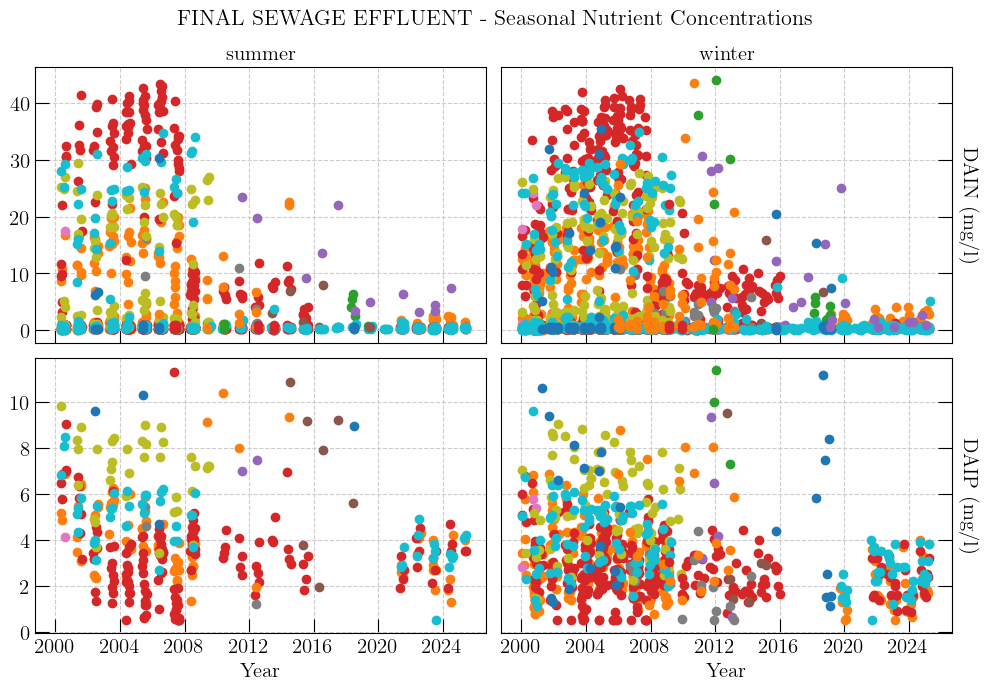

In [15]:
rf.plot_water_type_dain_daiP(
    label="OCEAN",
    df=samples_by_system[0],
    determinants_N=determinants_N,
    determinants_P=determinants_P,
    water_type_map=water_type_map
)

rf.plot_water_type_dain_daiP(
    label="ESTUARINE",
    df=samples_by_system[0],
    determinants_N=determinants_N,
    determinants_P=determinants_P,
    water_type_map=water_type_map
)

rf.plot_water_type_dain_daiP(
    label="RIVER",
    df=samples_by_system[0],
    determinants_N=determinants_N,
    determinants_P=determinants_P,
    water_type_map=water_type_map
)


rf.plot_water_type_dain_daiP(
    label="SEWAGE",
    df=samples_by_system[0],
    determinants_N=determinants_N,
    determinants_P=determinants_P,
    water_type_map=water_type_map
)